# Regression Machine Learning model with the Random Forrest algorithm
 A follow along project on drug discovery for *Zaire ebolavirus*

by Rea Kalampaliki

**Digital mentor**: Chanin Nantasenamat ([Data Professor](https://www.youtube.com/watch?v=qWVTxfLq2ak&list=PLtqF5YXg7GLlQJUv9XJ3RWdd5VYGwBHrP&index=2))

##Load GAR transformylase dataset

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv("/content/GAR_transformylase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv")

print(df.shape)
df.head()

(69, 882)


,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.318759
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.744727
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.366532
3,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.200659
4,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.698970


The ***GAR transformylase*** dataset contains:
- 881 features (PubChem fingerprint descriptors) 
- 1 target variable (pIC50 values)

## Features - target variable split

In [ ]:
X = df.drop("pIC50", axis=1)

print(X.shape)
X.head()

(69, 881)


,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = df['pIC50']

print(Y.shape)
Y.head()

(69,)


0    5.318759
1    4.744727
2    5.366532
3    6.200659
4    4.698970
Name: pIC50, dtype: float64

## Feature selection

We are going to use the **Low variance threshold** method. This method drops the features with variances smaller than a given threshold. If we use a column with bigger variance that equals to feeding our model with more information that the model can learn from.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

def variance_threshold_selector(data, threshold=(.8 * (1 - .8))):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [ ]:
X_selected = variance_threshold_selector(X)

In [ ]:
X_selected.head()

,PubchemFP33,PubchemFP143,PubchemFP145,PubchemFP146,PubchemFP179,PubchemFP185,PubchemFP187,PubchemFP188,PubchemFP192,PubchemFP258,PubchemFP259,PubchemFP293,PubchemFP353,PubchemFP357,PubchemFP377,PubchemFP383,PubchemFP389,PubchemFP399,PubchemFP400,PubchemFP412,PubchemFP421,PubchemFP431,PubchemFP437,PubchemFP471,PubchemFP480,PubchemFP488,PubchemFP498,PubchemFP499,PubchemFP500,PubchemFP502,PubchemFP507,PubchemFP513,PubchemFP527,PubchemFP531,PubchemFP532,PubchemFP539,PubchemFP541,PubchemFP546,PubchemFP547,PubchemFP548,PubchemFP557,PubchemFP569,PubchemFP572,PubchemFP573,PubchemFP574,PubchemFP576,PubchemFP577,PubchemFP580,PubchemFP586,PubchemFP590,PubchemFP606,PubchemFP611,PubchemFP618,PubchemFP619,PubchemFP624,PubchemFP638,PubchemFP641,PubchemFP647,PubchemFP651,PubchemFP652,PubchemFP655,PubchemFP658,PubchemFP667,PubchemFP673,PubchemFP689,PubchemFP691,PubchemFP695,PubchemFP696,PubchemFP697,PubchemFP702,PubchemFP707,PubchemFP713,PubchemFP716,PubchemFP776,PubchemFP779
0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1
1,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1
2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1
3,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1
4,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0


## Test-train split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_selected, Y, test_size=0.2)

print("Size of the original dataset:\n", X.shape, Y.shape)
print("Size of the train dataset:\n", X_train.shape, Y_train.shape)
print("Size of the test dataset:\n", X_test.shape, Y_test.shape)

Size of the original dataset:
 (69, 881) (69,)
Size of the train dataset:
 (55, 75) (55,)
Size of the test dataset:
 (14, 75) (14,)


In [ ]:
Y_train.reset_index(inplace=True, drop=True)
Y_test.reset_index(inplace=True, drop=True)

X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)

## Model's building

In [59]:
model = RandomForestRegressor(n_estimators=100, random_state=9)
model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=9, verbose=0, warm_start=False)

In [60]:
model.score(X_test, Y_test)

0.21584063296885792

In [61]:
Y_pred = model.predict(X_test)

## Scatterplot the Predicted VS the Experimental pIC50 values

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


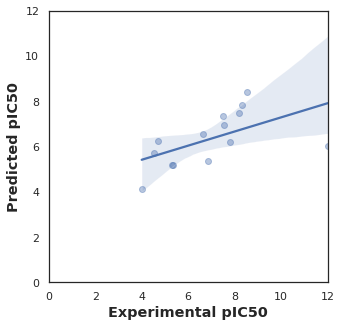

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()